In [1]:
import pandas as pd
import numpy as np
import math as math
import matplotlib.pyplot as plt
import seaborn as sns
import random
%matplotlib inline 

In [2]:
# to see all the columns when using head() or describe()
pd.set_option('display.max_columns',60)

In [3]:
df = pd.read_csv("kenya_data/diaries_transactions_all.csv", dtype={'account_startclose_balance': str})

In [6]:
scr = df[(df["trx_family_code"]=="SUPPCRD")&(df["trx_type_code"]==3394)]

Let's check everything went as expected.

In [7]:
scr["trx_type_desc"].unique()

array(['Supplier credit'], dtype=object)

In [8]:
scr["account_bsheet_desig"].unique()

array(['Liability'], dtype=object)

In [9]:
len(scr["account_ids"].unique())

67

In [10]:
scr["m_ids_owner"].unique()

array(['57134381707600000', '57134402623200000', '60134320188800000',
       '57134294490600000', '56134328720400000', '64134329480500000',
       '57134363181700000', '64134451105400000', '62134424394500000',
       '61134364237300000', '60134365798400000', '61134434981400000',
       '59134380191400000', '61134337487300000', '61134441545700000',
       '60134389594300000', '61134399881000000', 'HH',
       '61134449644300000', '62134426330600000', '62134337637200000',
       '65134382150500000', '59134381969800000', '79134829490300000',
       '79134829266800000', '57134364414700000', '57134406243100000',
       '60134423749000000', '60134397255200000', '60134543832000000',
       '64134461873300000', '89136376471200000', '56134388724900000',
       '62134580482100000', '50135271114900000', '61134406243400000',
       '58134407652600000', '57134408521700000'], dtype=object)

### One household loans.

## Purposes.

In [12]:
scr["trx_prx_purpose"].unique()

array(['INCREASE--Unexplained balance adjustment',
       '6. Closing Balance--End of last DQ',
       '1. Starting balance (today)', '3. Payments',
       '2. New purchase on credit',
       'DECREASE--Unexplained balance adjustment'], dtype=object)

## Interests?

In [13]:
len(scr[scr["trx_prx_purpose"]=="5. Interest accruing"]["account_ids"].unique())

0

### Only interests in 9 out of 21 loans joint liability loans.

In [14]:
len(scr[scr["trx_prx_purpose"]=="2. New purchase on credit"]["account_ids"].unique())

58

### Again there are many new borrowings.

In [15]:
len(scr[scr["trx_prx_purpose"]=="1. Starting balance (today)"]["account_ids"].unique())

16

In [16]:
len(scr[scr["trx_prx_purpose"]=="INCREASE--Unexplained balance adjustment"]["account_ids"].unique())

9

In [17]:
len(scr[scr["trx_prx_purpose"]=="DECREASE--Unexplained balance adjustment"]["account_ids"].unique())

10

In [18]:
len(scr[(scr["trx_prx_purpose"]=="DECREASE--Unexplained balance adjustment")|(scr["trx_prx_purpose"]=="DECREASE--Unexplained balance adjustment")]["account_ids"].unique())

10

### 10 accounts to be discarded because of unexplained balance adjustments.

In [20]:
len(scr[scr["trx_prx_purpose"]=="6. Closing Balance--End of last DQ"]["account_ids"].unique())

46

### 21 accounts don't have a closing balance.

In [21]:
clos_bal = []
for acc in scr[scr["trx_prx_purpose"]=="6. Closing Balance--End of last DQ"]["account_ids"].unique():
    clos = scr[(scr["trx_prx_purpose"]=="6. Closing Balance--End of last DQ")&(scr["account_ids"]==acc)]["trx_value_kes"]
    clos_bal.append(clos.values[0])

In [23]:
np.asarray(clos_bal).mean()

1524.4347826086957

## Look at one single account

In [24]:
acc = random.choice(scr["account_ids"].unique())

In [25]:
print(acc)

61135290365300000


acc = 61135290365300000

In [26]:
lna = scr[scr["account_ids"]==acc]

In [27]:
lna.shape

(23, 58)

In [33]:
lna = lna.sort_values("trx_stdtime_days_acc")

In [40]:
lna.insert(58, "trx_val_dir",np.zeros(lna.shape[0]))

In [35]:
for index, row in lna.iterrows():
    if lna.loc[index,"trx_bsheet_direction"]=="Increase":
        lna.at[index,"trx_val_dir"] = lna.loc[index,"trx_value_kes"]
    elif lna.loc[index,"trx_bsheet_direction"]=="Decrease":
        lna.at[index,"trx_val_dir"] = -lna.loc[index,"trx_value_kes"]
    else:
        print("Error neither increase nor decrease at index" + str(index)+ ":" + row["trx_prx_purpose"])

Error neither increase nor decrease at index3750:6. Closing Balance--End of last DQ


In [39]:
lna.insert(59,"bal_evol",np.zeros(lna.shape[0]))

In [37]:
s=0
for index,row in lna.iterrows():
    s+=lna.loc[index,"trx_val_dir"]
    lna.at[index,"bal_evol"]=s
lna[["account_ids","trx_stdtime_days_acc","trx_value_kes","trx_prx_purpose","trx_direction","trx_bsheet_direction","trx_val_dir","bal_evol"]]

,account_ids,trx_stdtime_days_acc,trx_value_kes,trx_prx_purpose,trx_direction,trx_bsheet_direction,trx_val_dir,bal_evol
177026,61135290365300000,0,1000.0,1. Starting balance (today),NaN,Increase,1000.0,1000.0
416356,61135290365300000,1,1000.0,3. Payments,Outflow,Decrease,-1000.0,0.0
290855,61135290365300000,2,300.0,2. New purchase on credit,Inflow,Increase,300.0,300.0
290856,61135290365300000,8,1500.0,3. Payments,Outflow,Decrease,-1500.0,-1200.0
326104,61135290365300000,22,3000.0,3. Payments,Outflow,Decrease,-3000.0,-4200.0
373388,61135290365300000,23,3000.0,2. New purchase on credit,Inflow,Increase,3000.0,-1200.0
200248,61135290365300000,29,2600.0,3. Payments,Outflow,Decrease,-2600.0,-3800.0
290860,61135290365300000,30,3000.0,2. New purchase on credit,Inflow,Increase,3000.0,-800.0
346297,61135290365300000,36,3000.0,3. Payments,Outflow,Decrease,-3000.0,-3800.0
398614,61135290365300000,37,3000.0,2. New purchase on credit,Inflow,Increase,3000.0,-800.0


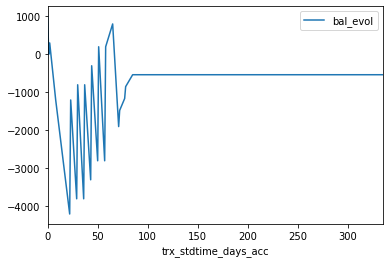

In [38]:
lna.plot(x="trx_stdtime_days_acc",y="bal_evol")

## Let's now use a for-loop to get the graphs for all joint liability loans.

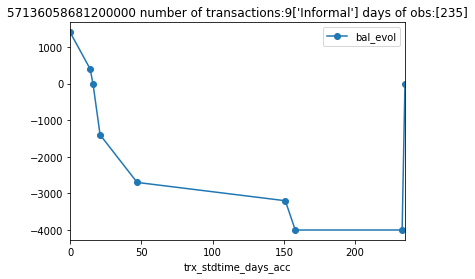

,trx_stdtime_days_hh,trx_stdtime_days_acc,trx_prx_purpose,trx_bsheet_direction,trx_direction,trx_value_kes,trx_val_dir,bal_evol
49697,151,0,2. New purchase on credit,Increase,Inflow,1400.0,1400.0,1400.0
219945,165,14,3. Payments,Decrease,Outflow,1000.0,-1000.0,400.0
254713,167,16,3. Payments,Decrease,Outflow,400.0,-400.0,0.0
335807,172,21,3. Payments,Decrease,Outflow,1400.0,-1400.0,-1400.0
152636,198,47,3. Payments,Decrease,Outflow,1300.0,-1300.0,-2700.0
139946,302,151,3. Payments,Decrease,Outflow,500.0,-500.0,-3200.0
244999,309,158,3. Payments,Decrease,Outflow,800.0,-800.0,-4000.0
15279,384,233,6. Closing Balance--End of last DQ,NaN,NaN,0.0,0.0,-4000.0
691,386,235,INCREASE--Unexplained balance adjustment,Increase,NaN,4000.0,4000.0,0.0


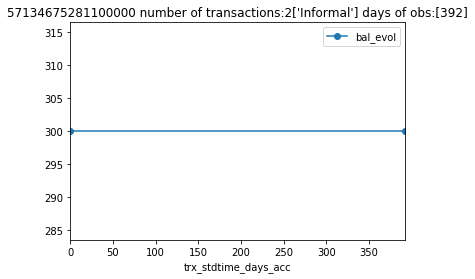

,trx_stdtime_days_hh,trx_stdtime_days_acc,trx_prx_purpose,trx_bsheet_direction,trx_direction,trx_value_kes,trx_val_dir,bal_evol
25326,0,0,1. Starting balance (today),Increase,NaN,300.0,300.0,300.0
760,392,392,6. Closing Balance--End of last DQ,NaN,NaN,300.0,0.0,300.0


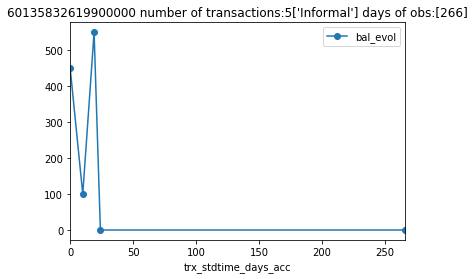

,trx_stdtime_days_hh,trx_stdtime_days_acc,trx_prx_purpose,trx_bsheet_direction,trx_direction,trx_value_kes,trx_val_dir,bal_evol
114679,140,0,2. New purchase on credit,Increase,Inflow,450.0,450.0,450.0
139525,150,10,3. Payments,Decrease,Outflow,350.0,-350.0,100.0
167027,159,19,2. New purchase on credit,Increase,Inflow,450.0,450.0,550.0
194608,164,24,3. Payments,Decrease,Outflow,550.0,-550.0,0.0
959,406,266,6. Closing Balance--End of last DQ,NaN,NaN,0.0,0.0,0.0


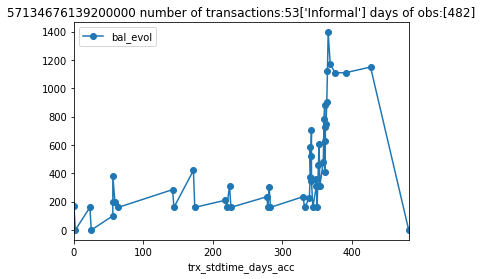

,trx_stdtime_days_hh,trx_stdtime_days_acc,trx_prx_purpose,trx_bsheet_direction,trx_direction,trx_value_kes,trx_val_dir,bal_evol
20737,1,0,1. Starting balance (today),Increase,NaN,170.0,170.0,170.0
413063,3,2,3. Payments,Decrease,Outflow,170.0,-170.0,0.0
234105,24,23,2. New purchase on credit,Increase,Inflow,160.0,160.0,160.0
413061,26,25,3. Payments,Decrease,Outflow,160.0,-160.0,0.0
19631,57,56,2. New purchase on credit,Increase,Inflow,100.0,100.0,100.0
24765,57,56,2. New purchase on credit,Increase,Inflow,100.0,100.0,200.0
271103,57,56,2. New purchase on credit,Increase,Inflow,180.0,180.0,380.0
332734,60,59,3. Payments,Decrease,Outflow,180.0,-180.0,200.0
413149,65,64,3. Payments,Decrease,Outflow,40.0,-40.0,160.0
262606,143,142,2. New purchase on credit,Increase,Inflow,125.0,125.0,285.0


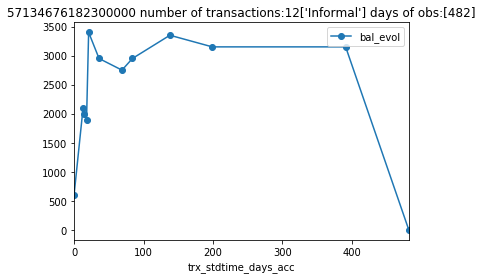

,trx_stdtime_days_hh,trx_stdtime_days_acc,trx_prx_purpose,trx_bsheet_direction,trx_direction,trx_value_kes,trx_val_dir,bal_evol
998,1,0,1. Starting balance (today),Increase,NaN,600.0,600.0,600.0
321893,14,13,2. New purchase on credit,Increase,Inflow,1500.0,1500.0,2100.0
92414,16,15,3. Payments,Decrease,Outflow,100.0,-100.0,2000.0
336429,19,18,3. Payments,Decrease,Outflow,100.0,-100.0,1900.0
413918,22,21,2. New purchase on credit,Increase,Inflow,1500.0,1500.0,3400.0
34781,37,36,3. Payments,Decrease,Outflow,450.0,-450.0,2950.0
351197,70,69,3. Payments,Decrease,Outflow,200.0,-200.0,2750.0
205031,85,84,2. New purchase on credit,Increase,Inflow,200.0,200.0,2950.0
160808,139,138,2. New purchase on credit,Increase,Inflow,400.0,400.0,3350.0
153416,200,199,3. Payments,Decrease,Outflow,200.0,-200.0,3150.0


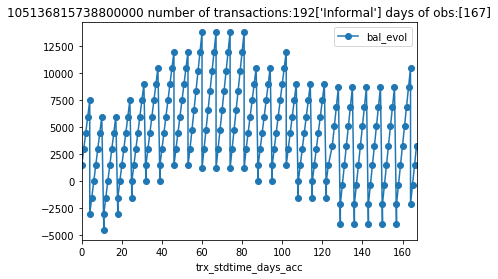

,trx_stdtime_days_hh,trx_stdtime_days_acc,trx_prx_purpose,trx_bsheet_direction,trx_direction,trx_value_kes,trx_val_dir,bal_evol
208523,228,0,2. New purchase on credit,Increase,Inflow,1500.0,1500.0,1500.0
203059,229,1,2. New purchase on credit,Increase,Inflow,1500.0,1500.0,3000.0
207608,230,2,2. New purchase on credit,Increase,Inflow,1500.0,1500.0,4500.0
203021,231,3,2. New purchase on credit,Increase,Inflow,1500.0,1500.0,6000.0
120482,232,4,2. New purchase on credit,Increase,Inflow,1500.0,1500.0,7500.0
56488,232,4,3. Payments,Decrease,Outflow,10500.0,-10500.0,-3000.0
49281,233,5,2. New purchase on credit,Increase,Inflow,1500.0,1500.0,-1500.0
193003,234,6,2. New purchase on credit,Increase,Inflow,1500.0,1500.0,0.0
202942,235,7,2. New purchase on credit,Increase,Inflow,1500.0,1500.0,1500.0
304008,236,8,2. New purchase on credit,Increase,Inflow,1500.0,1500.0,3000.0


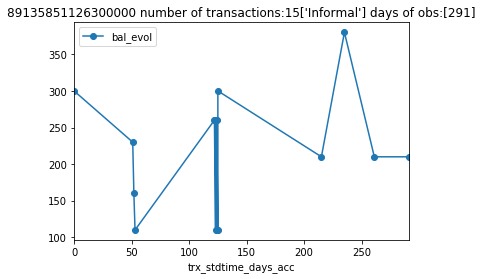

,trx_stdtime_days_hh,trx_stdtime_days_acc,trx_prx_purpose,trx_bsheet_direction,trx_direction,trx_value_kes,trx_val_dir,bal_evol
441453,39,0,2. New purchase on credit,Increase,Inflow,300.0,300.0,300.0
441404,90,51,3. Payments,Decrease,Outflow,70.0,-70.0,230.0
441133,91,52,3. Payments,Decrease,Outflow,70.0,-70.0,160.0
441263,92,53,3. Payments,Decrease,Outflow,50.0,-50.0,110.0
14813,161,122,2. New purchase on credit,Increase,Inflow,150.0,150.0,260.0
9501,162,123,3. Payments,Decrease,Outflow,150.0,-150.0,110.0
440969,162,123,2. New purchase on credit,Increase,Inflow,150.0,150.0,260.0
441190,163,124,3. Payments,Decrease,Outflow,150.0,-150.0,110.0
441456,163,124,2. New purchase on credit,Increase,Inflow,150.0,150.0,260.0
1185,164,125,3. Payments,Decrease,Outflow,150.0,-150.0,110.0


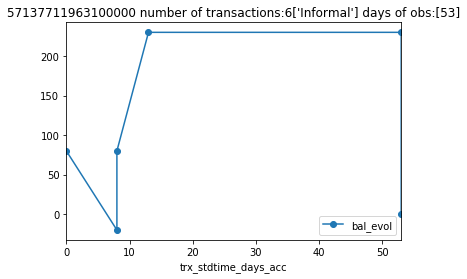

,trx_stdtime_days_hh,trx_stdtime_days_acc,trx_prx_purpose,trx_bsheet_direction,trx_direction,trx_value_kes,trx_val_dir,bal_evol
401075,339,0,2. New purchase on credit,Increase,Inflow,80.0,80.0,80.0
59734,347,8,3. Payments,Decrease,Outflow,100.0,-100.0,-20.0
161564,347,8,2. New purchase on credit,Increase,Inflow,100.0,100.0,80.0
314599,352,13,2. New purchase on credit,Increase,Inflow,150.0,150.0,230.0
1227,392,53,6. Closing Balance--End of last DQ,NaN,NaN,0.0,0.0,230.0
20185,392,53,DECREASE--Unexplained balance adjustment,Decrease,NaN,230.0,-230.0,0.0


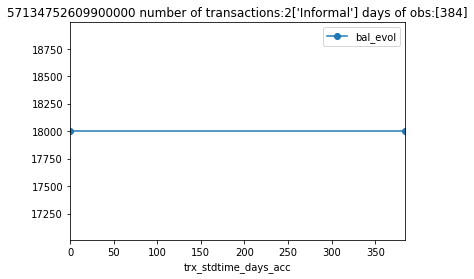

,trx_stdtime_days_hh,trx_stdtime_days_acc,trx_prx_purpose,trx_bsheet_direction,trx_direction,trx_value_kes,trx_val_dir,bal_evol
1246,5,0,1. Starting balance (today),Increase,NaN,18000.0,18000.0,18000.0
14686,389,384,6. Closing Balance--End of last DQ,NaN,NaN,18000.0,0.0,18000.0


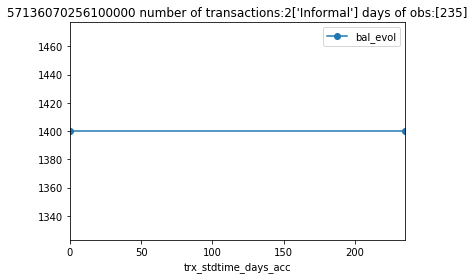

,trx_stdtime_days_hh,trx_stdtime_days_acc,trx_prx_purpose,trx_bsheet_direction,trx_direction,trx_value_kes,trx_val_dir,bal_evol
48001,151,0,2. New purchase on credit,Increase,Inflow,1400.0,1400.0,1400.0
1565,386,235,6. Closing Balance--End of last DQ,NaN,NaN,1400.0,0.0,1400.0


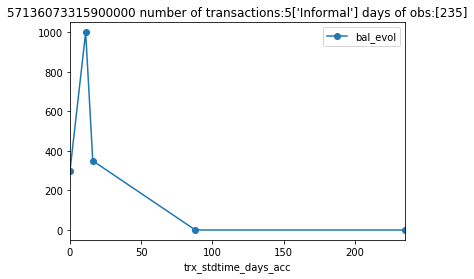

,trx_stdtime_days_hh,trx_stdtime_days_acc,trx_prx_purpose,trx_bsheet_direction,trx_direction,trx_value_kes,trx_val_dir,bal_evol
325864,151,0,2. New purchase on credit,Increase,Inflow,300.0,300.0,300.0
97534,162,11,2. New purchase on credit,Increase,Inflow,700.0,700.0,1000.0
150355,167,16,3. Payments,Decrease,Outflow,650.0,-650.0,350.0
222023,239,88,3. Payments,Decrease,Outflow,350.0,-350.0,0.0
1566,386,235,1. Starting balance (today),Increase,NaN,0.0,0.0,0.0


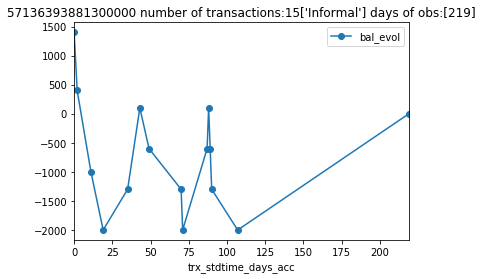

,trx_stdtime_days_hh,trx_stdtime_days_acc,trx_prx_purpose,trx_bsheet_direction,trx_direction,trx_value_kes,trx_val_dir,bal_evol
253681,167,0,2. New purchase on credit,Increase,Inflow,1400.0,1400.0,1400.0
82115,169,2,3. Payments,Decrease,Outflow,1000.0,-1000.0,400.0
86240,178,11,3. Payments,Decrease,Outflow,1400.0,-1400.0,-1000.0
317683,186,19,3. Payments,Decrease,Outflow,1000.0,-1000.0,-2000.0
188317,202,35,2. New purchase on credit,Increase,Inflow,700.0,700.0,-1300.0
312162,210,43,2. New purchase on credit,Increase,Inflow,1400.0,1400.0,100.0
245852,216,49,3. Payments,Decrease,Outflow,700.0,-700.0,-600.0
219386,237,70,3. Payments,Decrease,Outflow,700.0,-700.0,-1300.0
137041,238,71,3. Payments,Decrease,Outflow,700.0,-700.0,-2000.0
242070,254,87,2. New purchase on credit,Increase,Inflow,1400.0,1400.0,-600.0


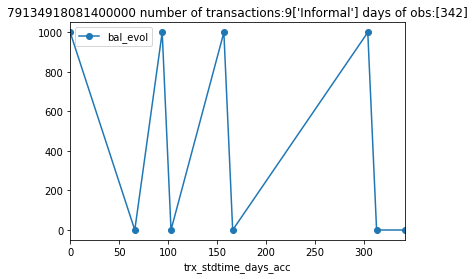

,trx_stdtime_days_hh,trx_stdtime_days_acc,trx_prx_purpose,trx_bsheet_direction,trx_direction,trx_value_kes,trx_val_dir,bal_evol
25931,14,0,1. Starting balance (today),Increase,NaN,1000.0,1000.0,1000.0
211732,80,66,3. Payments,Decrease,Outflow,1000.0,-1000.0,0.0
54081,108,94,2. New purchase on credit,Increase,Inflow,1000.0,1000.0,1000.0
265654,117,103,3. Payments,Decrease,Outflow,1000.0,-1000.0,0.0
118986,171,157,2. New purchase on credit,Increase,Inflow,1000.0,1000.0,1000.0
345757,180,166,3. Payments,Decrease,Outflow,1000.0,-1000.0,0.0
96906,318,304,2. New purchase on credit,Increase,Inflow,1000.0,1000.0,1000.0
122599,327,313,3. Payments,Decrease,Outflow,1000.0,-1000.0,0.0
2143,356,342,6. Closing Balance--End of last DQ,NaN,NaN,0.0,0.0,0.0


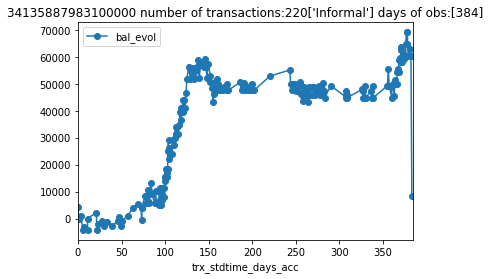

,trx_stdtime_days_hh,trx_stdtime_days_acc,trx_prx_purpose,trx_bsheet_direction,trx_direction,trx_value_kes,trx_val_dir,bal_evol
287530,41,0,2. New purchase on credit,Increase,Inflow,4250.0,4250.0,4250.0
420701,42,1,3. Payments,Decrease,Outflow,4250.0,-4250.0,0.0
63778,44,3,2. New purchase on credit,Increase,Inflow,1000.0,1000.0,1000.0
47719,47,6,3. Payments,Decrease,Outflow,5250.0,-5250.0,-4250.0
247398,48,7,2. New purchase on credit,Increase,Inflow,1115.0,1115.0,-3135.0
110774,52,11,3. Payments,Decrease,Outflow,1115.0,-1115.0,-4250.0
393996,52,11,2. New purchase on credit,Increase,Inflow,4250.0,4250.0,0.0
76014,62,21,2. New purchase on credit,Increase,Inflow,2200.0,2200.0,2200.0
243324,63,22,3. Payments,Decrease,Outflow,6450.0,-6450.0,-4250.0
315976,64,23,2. New purchase on credit,Increase,Inflow,2300.0,2300.0,-1950.0


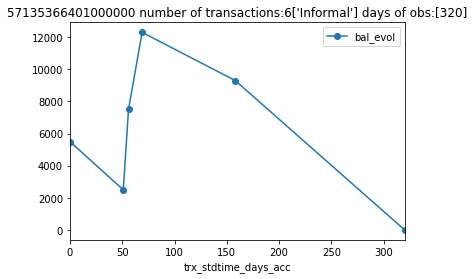

,trx_stdtime_days_hh,trx_stdtime_days_acc,trx_prx_purpose,trx_bsheet_direction,trx_direction,trx_value_kes,trx_val_dir,bal_evol
300146,66,0,2. New purchase on credit,Increase,Inflow,5500.0,5500.0,5500.0
178841,117,51,3. Payments,Decrease,Outflow,3000.0,-3000.0,2500.0
423660,122,56,2. New purchase on credit,Increase,Inflow,5000.0,5000.0,7500.0
468229,135,69,2. New purchase on credit,Increase,Inflow,4800.0,4800.0,12300.0
308960,224,158,3. Payments,Decrease,Outflow,3000.0,-3000.0,9300.0
3441,386,320,DECREASE--Unexplained balance adjustment,Decrease,NaN,9300.0,-9300.0,0.0


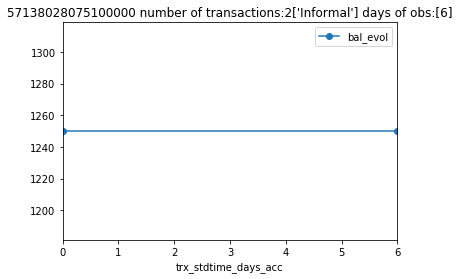

,trx_stdtime_days_hh,trx_stdtime_days_acc,trx_prx_purpose,trx_bsheet_direction,trx_direction,trx_value_kes,trx_val_dir,bal_evol
56992,378,0,2. New purchase on credit,Increase,Inflow,1250.0,1250.0,1250.0
3696,384,6,6. Closing Balance--End of last DQ,NaN,NaN,1250.0,0.0,1250.0


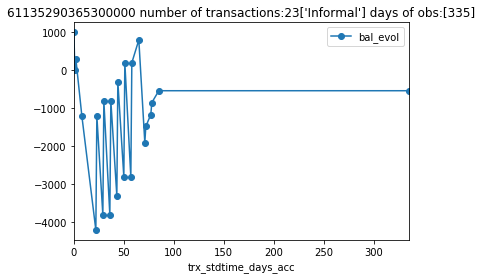

,trx_stdtime_days_hh,trx_stdtime_days_acc,trx_prx_purpose,trx_bsheet_direction,trx_direction,trx_value_kes,trx_val_dir,bal_evol
177026,46,0,1. Starting balance (today),Increase,NaN,1000.0,1000.0,1000.0
416356,47,1,3. Payments,Decrease,Outflow,1000.0,-1000.0,0.0
290855,48,2,2. New purchase on credit,Increase,Inflow,300.0,300.0,300.0
290856,54,8,3. Payments,Decrease,Outflow,1500.0,-1500.0,-1200.0
326104,68,22,3. Payments,Decrease,Outflow,3000.0,-3000.0,-4200.0
373388,69,23,2. New purchase on credit,Increase,Inflow,3000.0,3000.0,-1200.0
200248,75,29,3. Payments,Decrease,Outflow,2600.0,-2600.0,-3800.0
290860,76,30,2. New purchase on credit,Increase,Inflow,3000.0,3000.0,-800.0
346297,82,36,3. Payments,Decrease,Outflow,3000.0,-3000.0,-3800.0
398614,83,37,2. New purchase on credit,Increase,Inflow,3000.0,3000.0,-800.0


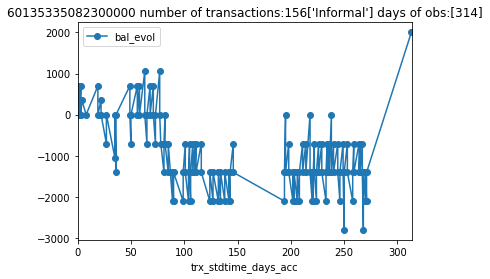

,trx_stdtime_days_hh,trx_stdtime_days_acc,trx_prx_purpose,trx_bsheet_direction,trx_direction,trx_value_kes,trx_val_dir,bal_evol
284161,51,0,2. New purchase on credit,Increase,Inflow,700.0,700.0,700.0
276324,51,0,3. Payments,Decrease,Outflow,700.0,-700.0,0.0
235916,53,2,2. New purchase on credit,Increase,Inflow,700.0,700.0,700.0
306559,53,2,3. Payments,Decrease,Outflow,700.0,-700.0,0.0
408548,54,3,2. New purchase on credit,Increase,Inflow,700.0,700.0,700.0
396793,54,3,3. Payments,Decrease,Outflow,700.0,-700.0,0.0
348809,55,4,2. New purchase on credit,Increase,Inflow,350.0,350.0,350.0
89185,59,8,3. Payments,Decrease,Outflow,350.0,-350.0,0.0
274338,70,19,2. New purchase on credit,Increase,Inflow,700.0,700.0,700.0
274337,70,19,3. Payments,Decrease,Outflow,700.0,-700.0,0.0


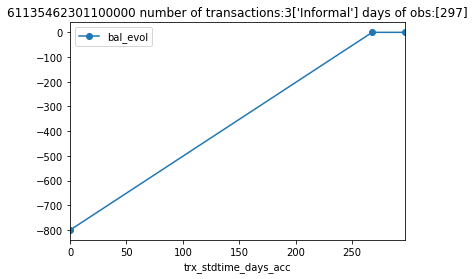

,trx_stdtime_days_hh,trx_stdtime_days_acc,trx_prx_purpose,trx_bsheet_direction,trx_direction,trx_value_kes,trx_val_dir,bal_evol
282731,100,0,3. Payments,Decrease,Outflow,800.0,-800.0,-800.0
5909,368,268,INCREASE--Unexplained balance adjustment,Increase,NaN,800.0,800.0,0.0
3872,397,297,6. Closing Balance--End of last DQ,NaN,NaN,0.0,0.0,0.0


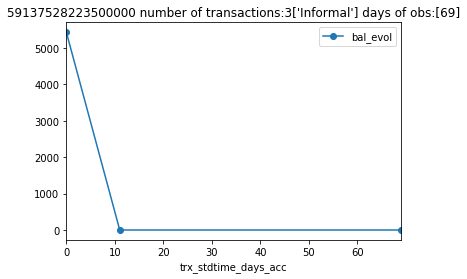

,trx_stdtime_days_hh,trx_stdtime_days_acc,trx_prx_purpose,trx_bsheet_direction,trx_direction,trx_value_kes,trx_val_dir,bal_evol
211423,325,0,2. New purchase on credit,Increase,Inflow,5430.0,5430.0,5430.0
234856,336,11,3. Payments,Decrease,Outflow,5430.0,-5430.0,0.0
4335,394,69,6. Closing Balance--End of last DQ,NaN,NaN,0.0,0.0,0.0


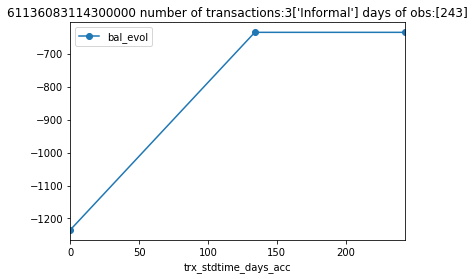

,trx_stdtime_days_hh,trx_stdtime_days_acc,trx_prx_purpose,trx_bsheet_direction,trx_direction,trx_value_kes,trx_val_dir,bal_evol
43814,143,0,3. Payments,Decrease,Outflow,1235.0,-1235.0,-1235.0
13797,277,134,1. Starting balance (today),Increase,NaN,600.0,600.0,-635.0
4835,386,243,6. Closing Balance--End of last DQ,NaN,NaN,600.0,0.0,-635.0


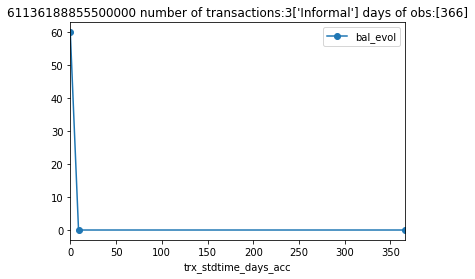

,trx_stdtime_days_hh,trx_stdtime_days_acc,trx_prx_purpose,trx_bsheet_direction,trx_direction,trx_value_kes,trx_val_dir,bal_evol
275722,35,0,2. New purchase on credit,Increase,Inflow,60.0,60.0,60.0
245997,44,9,3. Payments,Decrease,Outflow,60.0,-60.0,0.0
5083,401,366,6. Closing Balance--End of last DQ,NaN,NaN,0.0,0.0,0.0


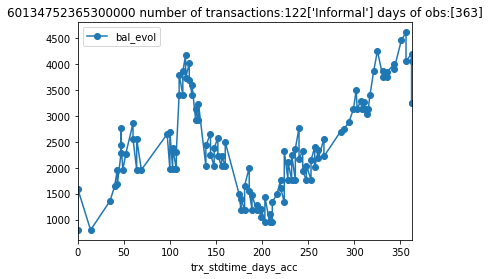

,trx_stdtime_days_hh,trx_stdtime_days_acc,trx_prx_purpose,trx_bsheet_direction,trx_direction,trx_value_kes,trx_val_dir,bal_evol
10390,5,0,1. Starting balance (today),Increase,NaN,800.0,800.0,800.0
243149,5,0,2. New purchase on credit,Increase,Inflow,800.0,800.0,1600.0
133621,19,14,3. Payments,Decrease,Outflow,800.0,-800.0,800.0
80495,40,35,2. New purchase on credit,Increase,Inflow,560.0,560.0,1360.0
55249,45,40,2. New purchase on credit,Increase,Inflow,280.0,280.0,1640.0
385967,48,43,2. New purchase on credit,Increase,Inflow,320.0,320.0,1960.0
119028,48,43,3. Payments,Decrease,Outflow,280.0,-280.0,1680.0
247327,52,47,2. New purchase on credit,Increase,Inflow,600.0,600.0,2280.0
284120,52,47,2. New purchase on credit,Increase,Inflow,480.0,480.0,2760.0
394787,52,47,3. Payments,Decrease,Outflow,320.0,-320.0,2440.0


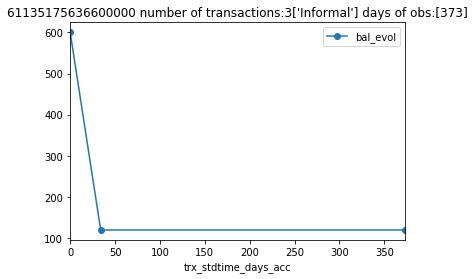

,trx_stdtime_days_hh,trx_stdtime_days_acc,trx_prx_purpose,trx_bsheet_direction,trx_direction,trx_value_kes,trx_val_dir,bal_evol
35943,3,0,1. Starting balance (today),Increase,NaN,600.0,600.0,600.0
260895,37,34,3. Payments,Decrease,Outflow,480.0,-480.0,120.0
5737,376,373,6. Closing Balance--End of last DQ,NaN,NaN,120.0,0.0,120.0


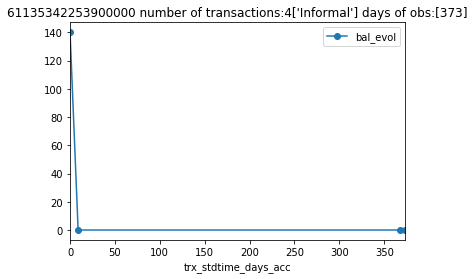

,trx_stdtime_days_hh,trx_stdtime_days_acc,trx_prx_purpose,trx_bsheet_direction,trx_direction,trx_value_kes,trx_val_dir,bal_evol
169910,13,0,2. New purchase on credit,Increase,Inflow,140.0,140.0,140.0
218508,22,9,3. Payments,Decrease,Outflow,140.0,-140.0,0.0
23325,381,368,6. Closing Balance--End of last DQ,NaN,NaN,0.0,0.0,0.0
5788,386,373,6. Closing Balance--End of last DQ,NaN,NaN,0.0,0.0,0.0


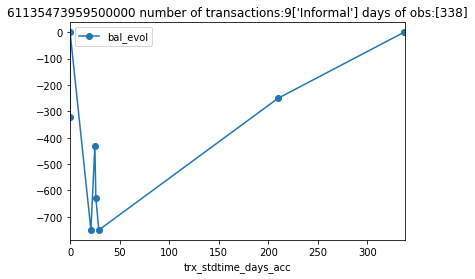

,trx_stdtime_days_hh,trx_stdtime_days_acc,trx_prx_purpose,trx_bsheet_direction,trx_direction,trx_value_kes,trx_val_dir,bal_evol
167139,35,0,3. Payments,Decrease,Outflow,320.0,-320.0,-320.0
481621,35,0,2. New purchase on credit,Increase,Inflow,320.0,320.0,0.0
293719,56,21,3. Payments,Decrease,Outflow,750.0,-750.0,-750.0
155649,60,25,2. New purchase on credit,Increase,Inflow,320.0,320.0,-430.0
114237,61,26,3. Payments,Decrease,Outflow,200.0,-200.0,-630.0
184369,64,29,3. Payments,Decrease,Outflow,120.0,-120.0,-750.0
463945,245,210,2. New purchase on credit,Increase,Inflow,500.0,500.0,-250.0
5917,372,337,INCREASE--Unexplained balance adjustment,Increase,NaN,250.0,250.0,0.0
14463,373,338,6. Closing Balance--End of last DQ,NaN,NaN,0.0,0.0,0.0


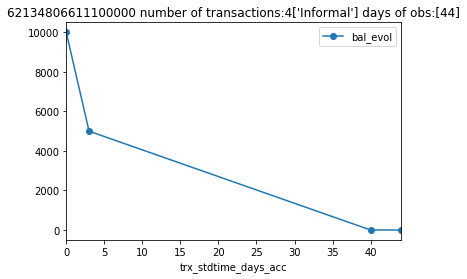

,trx_stdtime_days_hh,trx_stdtime_days_acc,trx_prx_purpose,trx_bsheet_direction,trx_direction,trx_value_kes,trx_val_dir,bal_evol
17789,389,0,2. New purchase on credit,Increase,Inflow,10000.0,10000.0,10000.0
83051,392,3,3. Payments,Decrease,Outflow,5000.0,-5000.0,5000.0
149576,429,40,3. Payments,Decrease,Outflow,5000.0,-5000.0,0.0
6711,433,44,6. Closing Balance--End of last DQ,NaN,NaN,0.0,0.0,0.0


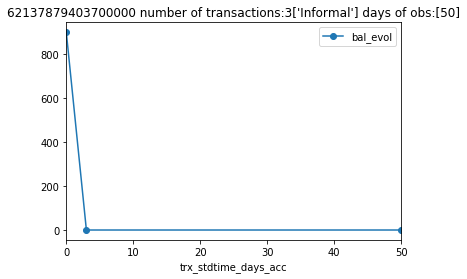

,trx_stdtime_days_hh,trx_stdtime_days_acc,trx_prx_purpose,trx_bsheet_direction,trx_direction,trx_value_kes,trx_val_dir,bal_evol
221255,378,0,2. New purchase on credit,Increase,Inflow,900.0,900.0,900.0
168691,381,3,3. Payments,Decrease,Outflow,900.0,-900.0,0.0
7177,428,50,6. Closing Balance--End of last DQ,NaN,NaN,0.0,0.0,0.0


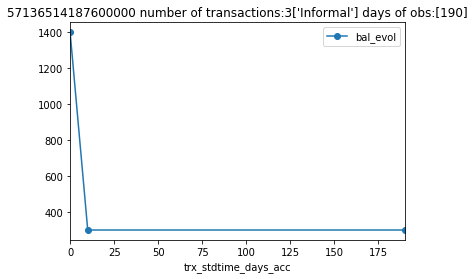

,trx_stdtime_days_hh,trx_stdtime_days_acc,trx_prx_purpose,trx_bsheet_direction,trx_direction,trx_value_kes,trx_val_dir,bal_evol
243093,196,0,2. New purchase on credit,Increase,Inflow,1400.0,1400.0,1400.0
339376,206,10,3. Payments,Decrease,Outflow,1100.0,-1100.0,300.0
7911,386,190,6. Closing Balance--End of last DQ,NaN,NaN,300.0,0.0,300.0


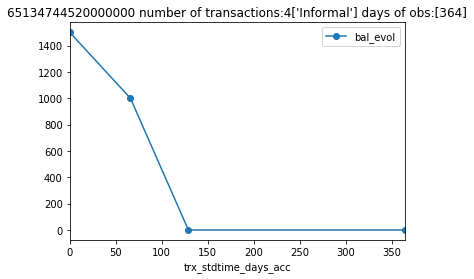

,trx_stdtime_days_hh,trx_stdtime_days_acc,trx_prx_purpose,trx_bsheet_direction,trx_direction,trx_value_kes,trx_val_dir,bal_evol
8368,9,0,1. Starting balance (today),Increase,NaN,1500.0,1500.0,1500.0
146896,75,66,3. Payments,Decrease,Outflow,500.0,-500.0,1000.0
187682,138,129,3. Payments,Decrease,Outflow,1000.0,-1000.0,0.0
9855,373,364,6. Closing Balance--End of last DQ,NaN,NaN,0.0,0.0,0.0


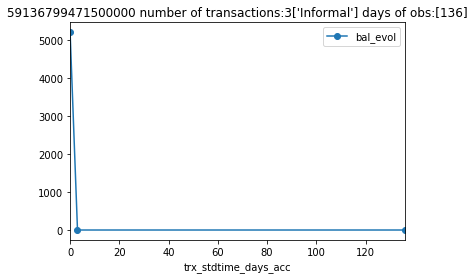

,trx_stdtime_days_hh,trx_stdtime_days_acc,trx_prx_purpose,trx_bsheet_direction,trx_direction,trx_value_kes,trx_val_dir,bal_evol
432786,241,0,2. New purchase on credit,Increase,Inflow,5200.0,5200.0,5200.0
432862,244,3,3. Payments,Decrease,Outflow,5200.0,-5200.0,0.0
8669,377,136,6. Closing Balance--End of last DQ,NaN,NaN,0.0,0.0,0.0


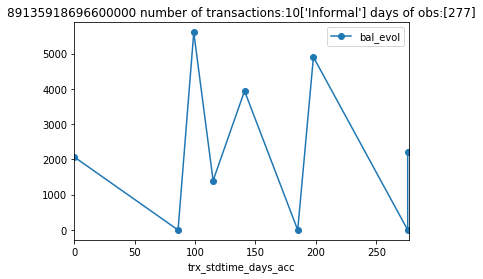

,trx_stdtime_days_hh,trx_stdtime_days_acc,trx_prx_purpose,trx_bsheet_direction,trx_direction,trx_value_kes,trx_val_dir,bal_evol
317013,96,0,2. New purchase on credit,Increase,Inflow,2072.0,2072.0,2072.0
400767,182,86,3. Payments,Decrease,Outflow,2072.0,-2072.0,0.0
399849,195,99,2. New purchase on credit,Increase,Inflow,5600.0,5600.0,5600.0
270865,211,115,3. Payments,Decrease,Outflow,4200.0,-4200.0,1400.0
80882,237,141,2. New purchase on credit,Increase,Inflow,2540.0,2540.0,3940.0
420766,281,185,3. Payments,Decrease,Outflow,3940.0,-3940.0,0.0
71956,294,198,2. New purchase on credit,Increase,Inflow,4900.0,4900.0,4900.0
10893,372,276,DECREASE--Unexplained balance adjustment,Decrease,NaN,4900.0,-4900.0,0.0
206273,372,276,2. New purchase on credit,Increase,Inflow,2200.0,2200.0,2200.0
24138,373,277,6. Closing Balance--End of last DQ,NaN,NaN,2200.0,0.0,2200.0


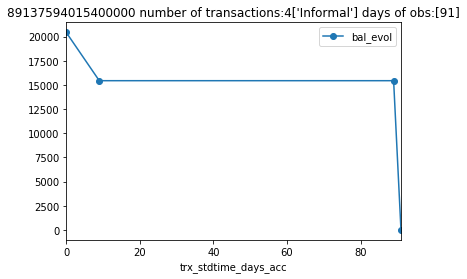

,trx_stdtime_days_hh,trx_stdtime_days_acc,trx_prx_purpose,trx_bsheet_direction,trx_direction,trx_value_kes,trx_val_dir,bal_evol
436684,284,0,2. New purchase on credit,Increase,Inflow,20440.0,20440.0,20440.0
436721,293,9,3. Payments,Decrease,Outflow,5000.0,-5000.0,15440.0
11133,373,89,6. Closing Balance--End of last DQ,NaN,NaN,0.0,0.0,15440.0
23850,375,91,DECREASE--Unexplained balance adjustment,Decrease,NaN,15440.0,-15440.0,0.0


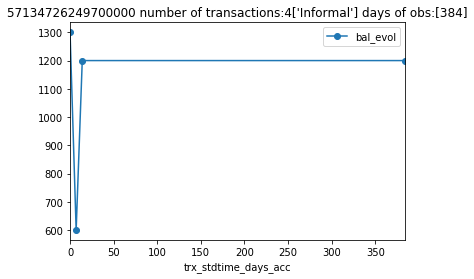

,trx_stdtime_days_hh,trx_stdtime_days_acc,trx_prx_purpose,trx_bsheet_direction,trx_direction,trx_value_kes,trx_val_dir,bal_evol
23710,0,0,1. Starting balance (today),Increase,NaN,1300.0,1300.0,1300.0
197828,7,7,3. Payments,Decrease,Outflow,700.0,-700.0,600.0
262367,14,14,2. New purchase on credit,Increase,Inflow,600.0,600.0,1200.0
11534,384,384,6. Closing Balance--End of last DQ,NaN,NaN,1200.0,0.0,1200.0


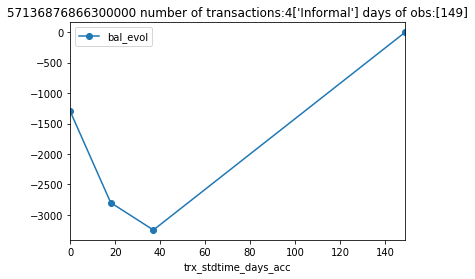

,trx_stdtime_days_hh,trx_stdtime_days_acc,trx_prx_purpose,trx_bsheet_direction,trx_direction,trx_value_kes,trx_val_dir,bal_evol
419800,237,0,3. Payments,Decrease,Outflow,1300.0,-1300.0,-1300.0
92815,255,18,3. Payments,Decrease,Outflow,1500.0,-1500.0,-2800.0
138120,274,37,3. Payments,Decrease,Outflow,450.0,-450.0,-3250.0
11951,386,149,INCREASE--Unexplained balance adjustment,Increase,NaN,3250.0,3250.0,0.0


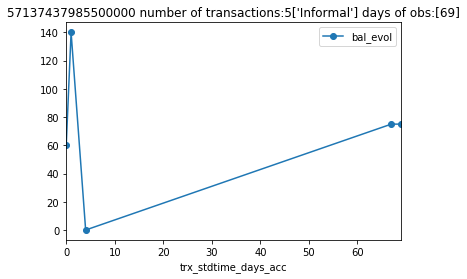

,trx_stdtime_days_hh,trx_stdtime_days_acc,trx_prx_purpose,trx_bsheet_direction,trx_direction,trx_value_kes,trx_val_dir,bal_evol
101173,320,0,2. New purchase on credit,Increase,Inflow,60.0,60.0,60.0
259198,321,1,2. New purchase on credit,Increase,Inflow,80.0,80.0,140.0
360205,324,4,3. Payments,Decrease,Outflow,140.0,-140.0,0.0
328173,387,67,2. New purchase on credit,Increase,Inflow,75.0,75.0,75.0
14102,389,69,6. Closing Balance--End of last DQ,NaN,NaN,75.0,0.0,75.0


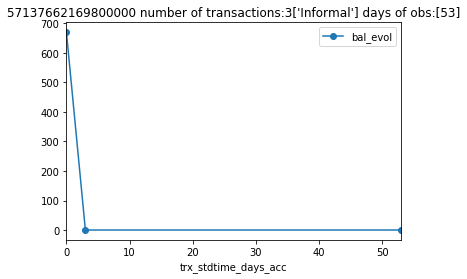

,trx_stdtime_days_hh,trx_stdtime_days_acc,trx_prx_purpose,trx_bsheet_direction,trx_direction,trx_value_kes,trx_val_dir,bal_evol
98140,339,0,2. New purchase on credit,Increase,Inflow,670.0,670.0,670.0
340046,342,3,3. Payments,Decrease,Outflow,670.0,-670.0,0.0
14157,392,53,6. Closing Balance--End of last DQ,NaN,NaN,0.0,0.0,0.0


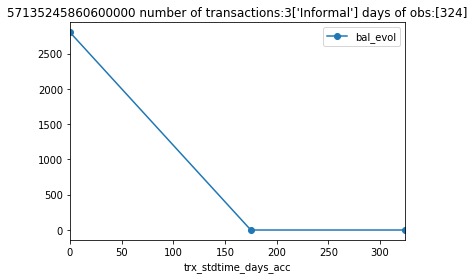

,trx_stdtime_days_hh,trx_stdtime_days_acc,trx_prx_purpose,trx_bsheet_direction,trx_direction,trx_value_kes,trx_val_dir,bal_evol
381175,62,0,2. New purchase on credit,Increase,Inflow,2800.0,2800.0,2800.0
381169,237,175,3. Payments,Decrease,Outflow,2800.0,-2800.0,0.0
14285,386,324,6. Closing Balance--End of last DQ,NaN,NaN,0.0,0.0,0.0


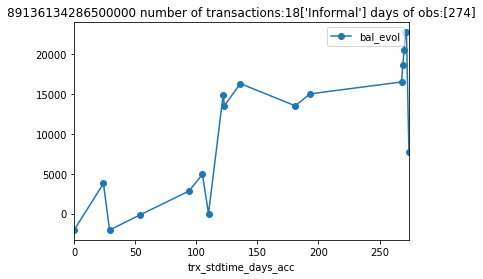

,trx_stdtime_days_hh,trx_stdtime_days_acc,trx_prx_purpose,trx_bsheet_direction,trx_direction,trx_value_kes,trx_val_dir,bal_evol
378294,101,0,3. Payments,Decrease,Outflow,2072.0,-2072.0,-2072.0
174400,125,24,2. New purchase on credit,Increase,Inflow,5850.0,5850.0,3778.0
317633,130,29,3. Payments,Decrease,Outflow,5850.0,-5850.0,-2072.0
109101,155,54,2. New purchase on credit,Increase,Inflow,1900.0,1900.0,-172.0
59554,195,94,2. New purchase on credit,Increase,Inflow,3000.0,3000.0,2828.0
262332,206,105,2. New purchase on credit,Increase,Inflow,2100.0,2100.0,4928.0
112186,211,110,3. Payments,Decrease,Outflow,4928.0,-4928.0,0.0
178914,223,122,2. New purchase on credit,Increase,Inflow,14947.0,14947.0,14947.0
67703,224,123,3. Payments,Decrease,Outflow,1400.0,-1400.0,13547.0
68925,237,136,2. New purchase on credit,Increase,Inflow,2800.0,2800.0,16347.0


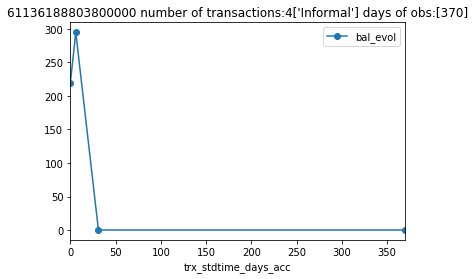

,trx_stdtime_days_hh,trx_stdtime_days_acc,trx_prx_purpose,trx_bsheet_direction,trx_direction,trx_value_kes,trx_val_dir,bal_evol
456336,31,0,2. New purchase on credit,Increase,Inflow,220.0,220.0,220.0
456315,37,6,2. New purchase on credit,Increase,Inflow,75.0,75.0,295.0
243550,62,31,3. Payments,Decrease,Outflow,295.0,-295.0,0.0
14732,401,370,6. Closing Balance--End of last DQ,NaN,NaN,0.0,0.0,0.0


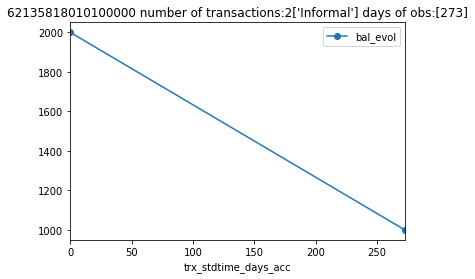

,trx_stdtime_days_hh,trx_stdtime_days_acc,trx_prx_purpose,trx_bsheet_direction,trx_direction,trx_value_kes,trx_val_dir,bal_evol
16013,16,0,1. Starting balance (today),Increase,NaN,2000.0,2000.0,2000.0
218189,289,273,3. Payments,Decrease,Outflow,1000.0,-1000.0,1000.0


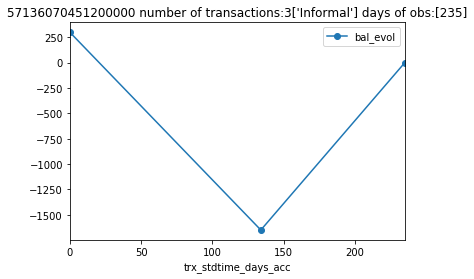

,trx_stdtime_days_hh,trx_stdtime_days_acc,trx_prx_purpose,trx_bsheet_direction,trx_direction,trx_value_kes,trx_val_dir,bal_evol
119713,151,0,2. New purchase on credit,Increase,Inflow,300.0,300.0,300.0
383710,285,134,3. Payments,Decrease,Outflow,1950.0,-1950.0,-1650.0
17435,386,235,INCREASE--Unexplained balance adjustment,Increase,NaN,1650.0,1650.0,0.0


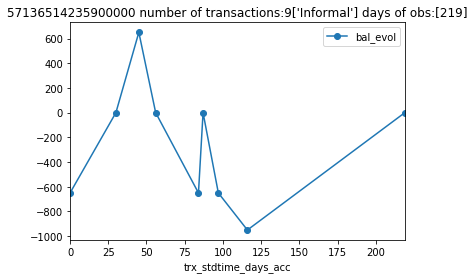

,trx_stdtime_days_hh,trx_stdtime_days_acc,trx_prx_purpose,trx_bsheet_direction,trx_direction,trx_value_kes,trx_val_dir,bal_evol
49582,167,0,3. Payments,Decrease,Outflow,650.0,-650.0,-650.0
387198,197,30,2. New purchase on credit,Increase,Inflow,650.0,650.0,0.0
39410,212,45,2. New purchase on credit,Increase,Inflow,650.0,650.0,650.0
229348,223,56,3. Payments,Decrease,Outflow,650.0,-650.0,0.0
314693,251,84,3. Payments,Decrease,Outflow,650.0,-650.0,-650.0
253916,254,87,2. New purchase on credit,Increase,Inflow,650.0,650.0,0.0
392008,264,97,3. Payments,Decrease,Outflow,650.0,-650.0,-650.0
312507,283,116,3. Payments,Decrease,Outflow,300.0,-300.0,-950.0
17510,386,219,INCREASE--Unexplained balance adjustment,Increase,NaN,950.0,950.0,0.0


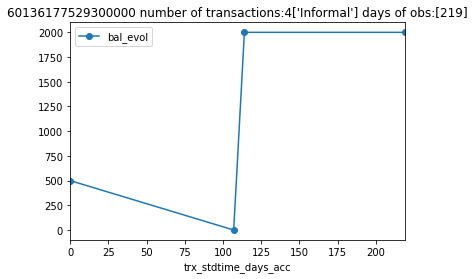

,trx_stdtime_days_hh,trx_stdtime_days_acc,trx_prx_purpose,trx_bsheet_direction,trx_direction,trx_value_kes,trx_val_dir,bal_evol
277515,157,0,2. New purchase on credit,Increase,Inflow,500.0,500.0,500.0
38846,264,107,3. Payments,Decrease,Outflow,500.0,-500.0,0.0
394345,271,114,2. New purchase on credit,Increase,Inflow,2000.0,2000.0,2000.0
22527,376,219,6. Closing Balance--End of last DQ,NaN,NaN,2000.0,0.0,2000.0


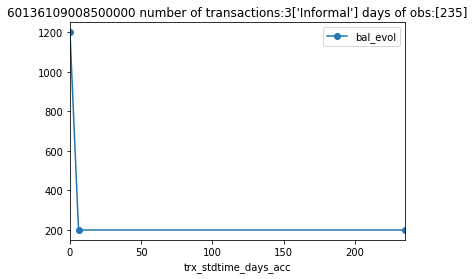

,trx_stdtime_days_hh,trx_stdtime_days_acc,trx_prx_purpose,trx_bsheet_direction,trx_direction,trx_value_kes,trx_val_dir,bal_evol
277218,139,0,2. New purchase on credit,Increase,Inflow,1200.0,1200.0,1200.0
170741,145,6,3. Payments,Decrease,Outflow,1000.0,-1000.0,200.0
22708,374,235,6. Closing Balance--End of last DQ,NaN,NaN,0.0,0.0,200.0


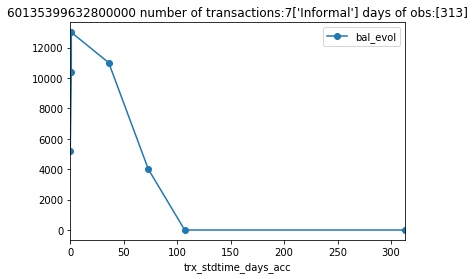

,trx_stdtime_days_hh,trx_stdtime_days_acc,trx_prx_purpose,trx_bsheet_direction,trx_direction,trx_value_kes,trx_val_dir,bal_evol
129402,75,0,2. New purchase on credit,Increase,Inflow,5200.0,5200.0,5200.0
146970,76,1,2. New purchase on credit,Increase,Inflow,5200.0,5200.0,10400.0
160561,76,1,2. New purchase on credit,Increase,Inflow,2600.0,2600.0,13000.0
286662,111,36,3. Payments,Decrease,Outflow,2000.0,-2000.0,11000.0
323660,148,73,3. Payments,Decrease,Outflow,7000.0,-7000.0,4000.0
296150,182,107,3. Payments,Decrease,Outflow,4000.0,-4000.0,0.0
22730,388,313,6. Closing Balance--End of last DQ,NaN,NaN,0.0,0.0,0.0


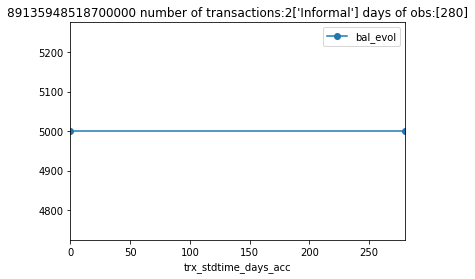

,trx_stdtime_days_hh,trx_stdtime_days_acc,trx_prx_purpose,trx_bsheet_direction,trx_direction,trx_value_kes,trx_val_dir,bal_evol
22784,76,0,1. Starting balance (today),Increase,NaN,5000.0,5000.0,5000.0
103801,356,280,6. Closing Balance--End of last DQ,NaN,NaN,5000.0,0.0,5000.0


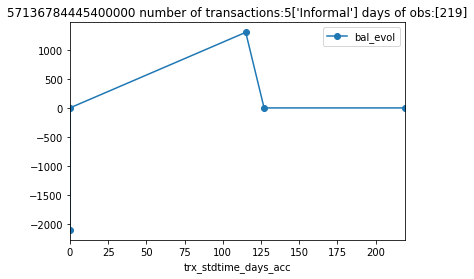

,trx_stdtime_days_hh,trx_stdtime_days_acc,trx_prx_purpose,trx_bsheet_direction,trx_direction,trx_value_kes,trx_val_dir,bal_evol
141324,167,0,3. Payments,Decrease,Outflow,2100.0,-2100.0,-2100.0
402331,167,0,2. New purchase on credit,Increase,Inflow,2100.0,2100.0,0.0
45899,282,115,2. New purchase on credit,Increase,Inflow,1300.0,1300.0,1300.0
307042,294,127,3. Payments,Decrease,Outflow,1300.0,-1300.0,0.0
22803,386,219,6. Closing Balance--End of last DQ,NaN,NaN,0.0,0.0,0.0


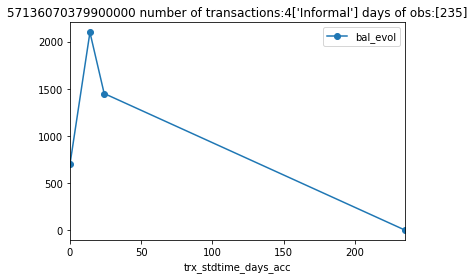

,trx_stdtime_days_hh,trx_stdtime_days_acc,trx_prx_purpose,trx_bsheet_direction,trx_direction,trx_value_kes,trx_val_dir,bal_evol
183319,151,0,2. New purchase on credit,Increase,Inflow,700.0,700.0,700.0
49491,165,14,2. New purchase on credit,Increase,Inflow,1400.0,1400.0,2100.0
352805,175,24,3. Payments,Decrease,Outflow,650.0,-650.0,1450.0
23055,386,235,DECREASE--Unexplained balance adjustment,Decrease,NaN,1450.0,-1450.0,0.0


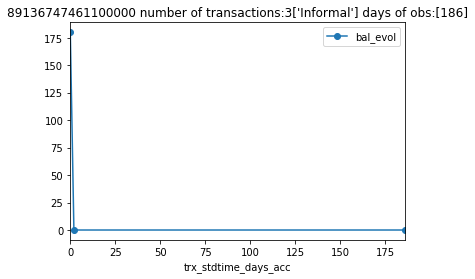

,trx_stdtime_days_hh,trx_stdtime_days_acc,trx_prx_purpose,trx_bsheet_direction,trx_direction,trx_value_kes,trx_val_dir,bal_evol
196288,28,0,2. New purchase on credit,Increase,Inflow,180.0,180.0,180.0
411259,30,2,3. Payments,Decrease,Outflow,180.0,-180.0,0.0
23323,214,186,6. Closing Balance--End of last DQ,NaN,NaN,0.0,0.0,0.0


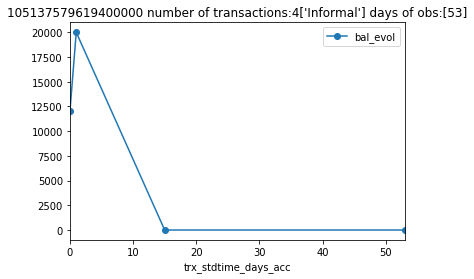

,trx_stdtime_days_hh,trx_stdtime_days_acc,trx_prx_purpose,trx_bsheet_direction,trx_direction,trx_value_kes,trx_val_dir,bal_evol
383542,331,0,2. New purchase on credit,Increase,Inflow,12000.0,12000.0,12000.0
391099,332,1,2. New purchase on credit,Increase,Inflow,8000.0,8000.0,20000.0
39682,346,15,3. Payments,Decrease,Outflow,20000.0,-20000.0,0.0
23432,384,53,6. Closing Balance--End of last DQ,NaN,NaN,0.0,0.0,0.0


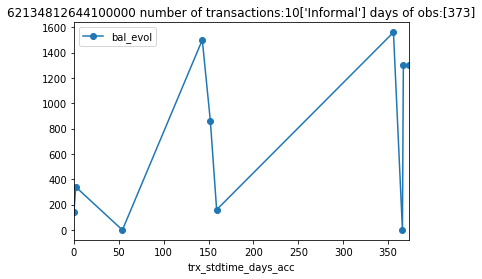

,trx_stdtime_days_hh,trx_stdtime_days_acc,trx_prx_purpose,trx_bsheet_direction,trx_direction,trx_value_kes,trx_val_dir,bal_evol
128724,41,0,2. New purchase on credit,Increase,Inflow,140.0,140.0,140.0
309607,43,2,2. New purchase on credit,Increase,Inflow,200.0,200.0,340.0
315508,95,54,3. Payments,Decrease,Outflow,340.0,-340.0,0.0
309609,184,143,2. New purchase on credit,Increase,Inflow,1500.0,1500.0,1500.0
87160,193,152,3. Payments,Decrease,Outflow,640.0,-640.0,860.0
312400,200,159,3. Payments,Decrease,Outflow,700.0,-700.0,160.0
34026,397,356,2. New purchase on credit,Increase,Inflow,1400.0,1400.0,1560.0
186276,407,366,3. Payments,Decrease,Outflow,1560.0,-1560.0,0.0
421088,408,367,2. New purchase on credit,Increase,Inflow,1300.0,1300.0,1300.0
24009,414,373,6. Closing Balance--End of last DQ,NaN,NaN,1300.0,0.0,1300.0


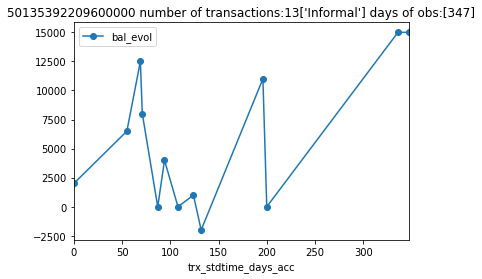

,trx_stdtime_days_hh,trx_stdtime_days_acc,trx_prx_purpose,trx_bsheet_direction,trx_direction,trx_value_kes,trx_val_dir,bal_evol
25979,15,0,1. Starting balance (today),Increase,NaN,2000.0,2000.0,2000.0
290048,70,55,2. New purchase on credit,Increase,Inflow,4500.0,4500.0,6500.0
159877,84,69,2. New purchase on credit,Increase,Inflow,6000.0,6000.0,12500.0
385437,86,71,3. Payments,Decrease,Outflow,4500.0,-4500.0,8000.0
189829,102,87,3. Payments,Decrease,Outflow,8000.0,-8000.0,0.0
136403,109,94,2. New purchase on credit,Increase,Inflow,4000.0,4000.0,4000.0
323539,123,108,3. Payments,Decrease,Outflow,4000.0,-4000.0,0.0
361015,139,124,2. New purchase on credit,Increase,Inflow,1000.0,1000.0,1000.0
27765,147,132,3. Payments,Decrease,Outflow,3000.0,-3000.0,-2000.0
417859,211,196,2. New purchase on credit,Increase,Inflow,13000.0,13000.0,11000.0


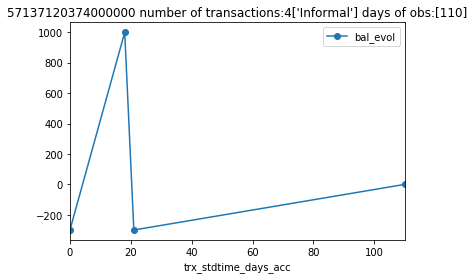

,trx_stdtime_days_hh,trx_stdtime_days_acc,trx_prx_purpose,trx_bsheet_direction,trx_direction,trx_value_kes,trx_val_dir,bal_evol
131198,276,0,3. Payments,Decrease,Outflow,300.0,-300.0,-300.0
378601,294,18,2. New purchase on credit,Increase,Inflow,1300.0,1300.0,1000.0
309422,297,21,3. Payments,Decrease,Outflow,1300.0,-1300.0,-300.0
25388,386,110,INCREASE--Unexplained balance adjustment,Increase,NaN,300.0,300.0,0.0


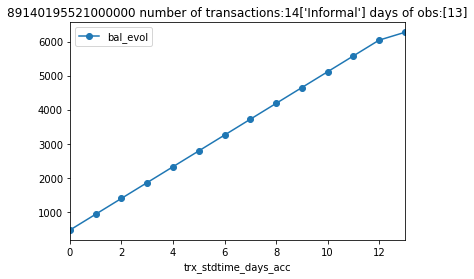

,trx_stdtime_days_hh,trx_stdtime_days_acc,trx_prx_purpose,trx_bsheet_direction,trx_direction,trx_value_kes,trx_val_dir,bal_evol
337391,211,0,2. New purchase on credit,Increase,Inflow,465.0,465.0,465.0
348706,212,1,2. New purchase on credit,Increase,Inflow,465.0,465.0,930.0
408656,213,2,2. New purchase on credit,Increase,Inflow,465.0,465.0,1395.0
230721,214,3,2. New purchase on credit,Increase,Inflow,465.0,465.0,1860.0
151696,215,4,2. New purchase on credit,Increase,Inflow,465.0,465.0,2325.0
221449,216,5,2. New purchase on credit,Increase,Inflow,465.0,465.0,2790.0
408650,217,6,2. New purchase on credit,Increase,Inflow,465.0,465.0,3255.0
358638,218,7,2. New purchase on credit,Increase,Inflow,465.0,465.0,3720.0
394568,219,8,2. New purchase on credit,Increase,Inflow,465.0,465.0,4185.0
331091,220,9,2. New purchase on credit,Increase,Inflow,465.0,465.0,4650.0


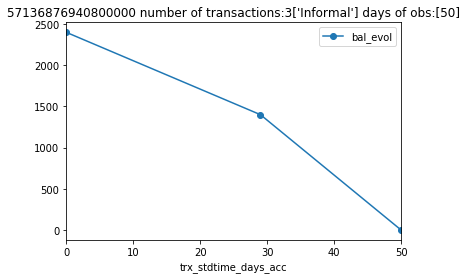

,trx_stdtime_days_hh,trx_stdtime_days_acc,trx_prx_purpose,trx_bsheet_direction,trx_direction,trx_value_kes,trx_val_dir,bal_evol
305151,224,0,2. New purchase on credit,Increase,Inflow,2400.0,2400.0,2400.0
58293,253,29,3. Payments,Decrease,Outflow,1000.0,-1000.0,1400.0
389271,274,50,3. Payments,Decrease,Outflow,1400.0,-1400.0,0.0


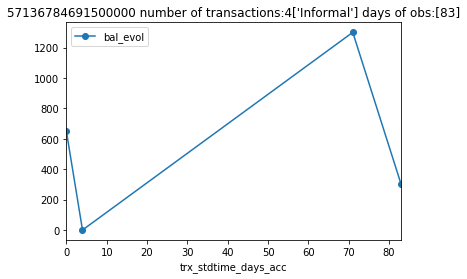

,trx_stdtime_days_hh,trx_stdtime_days_acc,trx_prx_purpose,trx_bsheet_direction,trx_direction,trx_value_kes,trx_val_dir,bal_evol
263526,167,0,2. New purchase on credit,Increase,Inflow,650.0,650.0,650.0
251918,171,4,3. Payments,Decrease,Outflow,650.0,-650.0,0.0
69631,238,71,2. New purchase on credit,Increase,Inflow,1300.0,1300.0,1300.0
61583,250,83,3. Payments,Decrease,Outflow,1000.0,-1000.0,300.0


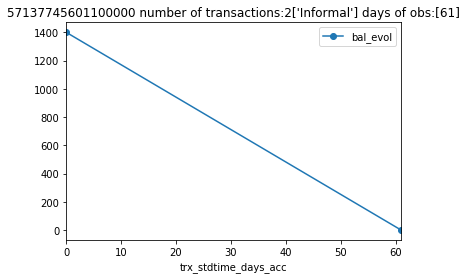

,trx_stdtime_days_hh,trx_stdtime_days_acc,trx_prx_purpose,trx_bsheet_direction,trx_direction,trx_value_kes,trx_val_dir,bal_evol
71966,210,0,2. New purchase on credit,Increase,Inflow,1400.0,1400.0,1400.0
208265,271,61,3. Payments,Decrease,Outflow,1400.0,-1400.0,0.0


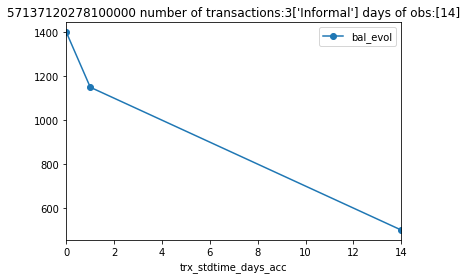

,trx_stdtime_days_hh,trx_stdtime_days_acc,trx_prx_purpose,trx_bsheet_direction,trx_direction,trx_value_kes,trx_val_dir,bal_evol
287978,278,0,2. New purchase on credit,Increase,Inflow,1400.0,1400.0,1400.0
113777,279,1,3. Payments,Decrease,Outflow,250.0,-250.0,1150.0
422572,292,14,3. Payments,Decrease,Outflow,650.0,-650.0,500.0


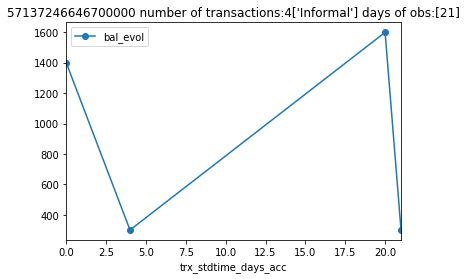

,trx_stdtime_days_hh,trx_stdtime_days_acc,trx_prx_purpose,trx_bsheet_direction,trx_direction,trx_value_kes,trx_val_dir,bal_evol
168370,275,0,2. New purchase on credit,Increase,Inflow,1400.0,1400.0,1400.0
293243,279,4,3. Payments,Decrease,Outflow,1100.0,-1100.0,300.0
119719,295,20,2. New purchase on credit,Increase,Inflow,1300.0,1300.0,1600.0
131359,296,21,3. Payments,Decrease,Outflow,1300.0,-1300.0,300.0


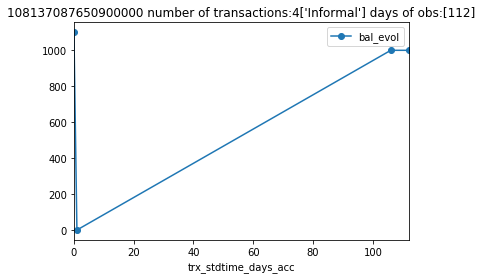

,trx_stdtime_days_hh,trx_stdtime_days_acc,trx_prx_purpose,trx_bsheet_direction,trx_direction,trx_value_kes,trx_val_dir,bal_evol
410934,271,0,2. New purchase on credit,Increase,Inflow,1100.0,1100.0,1100.0
412155,272,1,3. Payments,Decrease,Outflow,1100.0,-1100.0,0.0
307453,377,106,2. New purchase on credit,Increase,Inflow,1000.0,1000.0,1000.0
183209,383,112,6. Closing Balance--End of last DQ,NaN,NaN,1000.0,0.0,1000.0


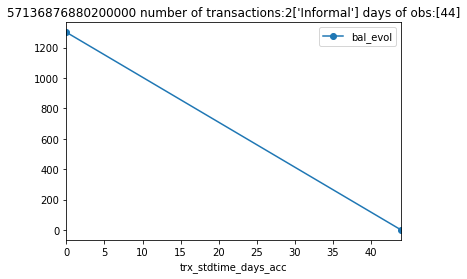

,trx_stdtime_days_hh,trx_stdtime_days_acc,trx_prx_purpose,trx_bsheet_direction,trx_direction,trx_value_kes,trx_val_dir,bal_evol
229305,250,0,2. New purchase on credit,Increase,Inflow,1300.0,1300.0,1300.0
197452,294,44,3. Payments,Decrease,Outflow,1300.0,-1300.0,0.0


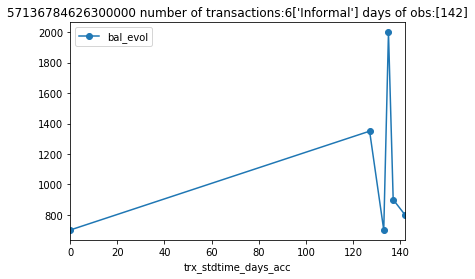

,trx_stdtime_days_hh,trx_stdtime_days_acc,trx_prx_purpose,trx_bsheet_direction,trx_direction,trx_value_kes,trx_val_dir,bal_evol
307032,167,0,2. New purchase on credit,Increase,Inflow,700.0,700.0,700.0
307026,294,127,2. New purchase on credit,Increase,Inflow,650.0,650.0,1350.0
291720,300,133,3. Payments,Decrease,Outflow,650.0,-650.0,700.0
214460,302,135,2. New purchase on credit,Increase,Inflow,1300.0,1300.0,2000.0
267271,304,137,3. Payments,Decrease,Outflow,1100.0,-1100.0,900.0
307010,309,142,3. Payments,Decrease,Outflow,100.0,-100.0,800.0


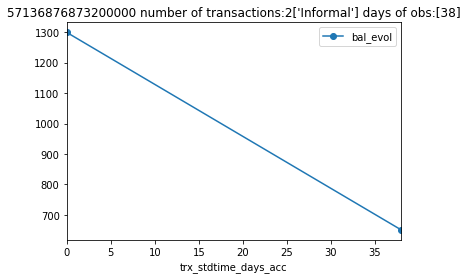

,trx_stdtime_days_hh,trx_stdtime_days_acc,trx_prx_purpose,trx_bsheet_direction,trx_direction,trx_value_kes,trx_val_dir,bal_evol
229072,238,0,2. New purchase on credit,Increase,Inflow,1300.0,1300.0,1300.0
305159,276,38,3. Payments,Decrease,Outflow,650.0,-650.0,650.0


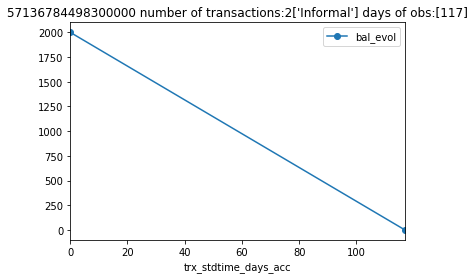

,trx_stdtime_days_hh,trx_stdtime_days_acc,trx_prx_purpose,trx_bsheet_direction,trx_direction,trx_value_kes,trx_val_dir,bal_evol
392453,167,0,2. New purchase on credit,Increase,Inflow,2000.0,2000.0,2000.0
260168,284,117,3. Payments,Decrease,Outflow,2000.0,-2000.0,0.0


/anaconda3/lib/python3.7/site-packages/pandas/plotting/_core.py:1001: UserWarning: Attempting to set identical left == right == 0.0 results in singular transformations; automatically expanding.
  ax.set_xlim(left, right)


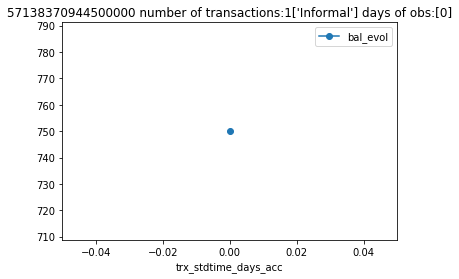

,trx_stdtime_days_hh,trx_stdtime_days_acc,trx_prx_purpose,trx_bsheet_direction,trx_direction,trx_value_kes,trx_val_dir,bal_evol
285893,83,0,2. New purchase on credit,Increase,Inflow,750.0,750.0,750.0


/anaconda3/lib/python3.7/site-packages/pandas/plotting/_core.py:1001: UserWarning: Attempting to set identical left == right == 0.0 results in singular transformations; automatically expanding.
  ax.set_xlim(left, right)


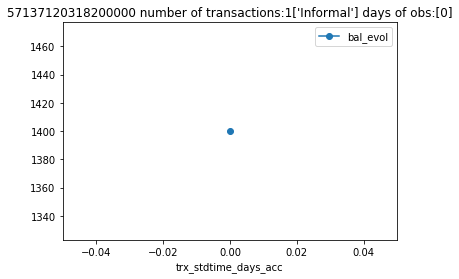

,trx_stdtime_days_hh,trx_stdtime_days_acc,trx_prx_purpose,trx_bsheet_direction,trx_direction,trx_value_kes,trx_val_dir,bal_evol
304082,274,0,2. New purchase on credit,Increase,Inflow,1400.0,1400.0,1400.0


In [42]:
for acc in scr["account_ids"].unique():
    lna = scr[scr["account_ids"]==acc]
    lna = lna.sort_values("trx_stdtime_days_acc")
    
    #add transaction with direction for account
    lna.insert(58, "trx_val_dir",np.zeros(lna.shape[0]))
    for index, row in lna.iterrows():
        if lna.loc[index,"trx_bsheet_direction"]=="Increase":
            lna.at[index,"trx_val_dir"] = lna.loc[index,"trx_value_kes"]
        elif lna.loc[index,"trx_bsheet_direction"]=="Decrease":
            lna.at[index,"trx_val_dir"] = -lna.loc[index,"trx_value_kes"]
        elif row["trx_prx_purpose"]!="6. Closing Balance--End of last DQ":
            print("Error neither increase nor decrease, nor closing balance at index" + str(index) + ".")
    
    #add balance evolution
    lna.insert(59,"bal_evol",np.zeros(lna.shape[0]))
    
    s=0
    for index,row in lna.iterrows():
        s+=lna.loc[index,"trx_val_dir"]
        lna.at[index,"bal_evol"]=s
        
    
    lna.plot(x="trx_stdtime_days_acc",y="bal_evol",marker='o', title=acc + " number of transactions:"+ str(lna.shape[0]) + str(lna["account_formal"].unique())+ " days of obs:" + str(lna["tot_acc_daysofobs"].unique()))
    plt.show()
    display(lna[["trx_stdtime_days_hh","trx_stdtime_days_acc","trx_prx_purpose","trx_bsheet_direction","trx_direction","trx_value_kes","trx_val_dir","bal_evol"]])

    